# Deep Learning Lab - Report on the Third Exercise

## Joshua Heipel

## matriculation number: 3706603

In [1]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML

## 1. Implementation of the (multilevel) decoder for FCNs

The goal of the first exercise was to build a simple decoder module for FCNs in Tensorflow with a single upsampling stage. This was done by a transposed convolutional layer *(tc.layers.conv2d_transpose())* with batch normalization and exponential linear unit activation (ELU) as specified in the definition of tasks. Stride and filtersize were chosen to be equal to the upsampling rate. The spatial resolution of the upsampled image was cropped to the size of the input image if necessary. In order to reuse the upsampling module in other configurations, layer definitions were wrapped into a function *(UpsamplingModule())*.

The second exercise was to implement a refinement module, which makes use of incomming skip-connections from the encoder stream. As prescribed by the exercise sheet the lower level representation of the encoded image was upsampled and concatenated with the skip connection. To fuse decoder and encoder features a standard convolutional layer with kernelsize 3x3 was used. Again the layer definitions were wrapped into a function *(RefinementModule())* for reuse. Finally different configurations with varying number of upsampling levels were defined inside the *nets_definition.py* file. Training and Testing was done on the *CamVid* semantic segmentation dataset by the given templates *Train_Net.py* and *Test_Net.py*.

## 2. Results from different Configurations

Training of the network took about 2,5 hours for each configuration (negligable differences) by making use of the GPUs of the computers in the CIP Pool. During training the accuracy on the training set gradually increased on up to 96% - 97% (smoothed values) while loss was reduced down to values of about 0.02. The following figure shows the Intersection over Union values (IoU) on the test set computed with the learned parameter sets from training phase. X-axis shows the number of computation steps (500 steps per epoch) and Y-axis gives the calculated IoU.

In [16]:
# read files
test1 = readIOU("checkpoints/ultraslimS_1/testIoU.txt")
test2 = readIOU("checkpoints/ultraslimS_2/testIoU.txt")
test3 = readIOU("checkpoints/ultraslimS_3/testIoU.txt")
test4 = readIOU("checkpoints/ultraslimS_4/testIoU.txt")

# calculate maximum iou of each configuration
best_iou1 = test1[:,1].max(axis=0)
best_iou2 = test2[:,1].max(axis=0)
best_iou3 = test3[:,1].max(axis=0)
best_iou4 = test4[:,1].max(axis=0)

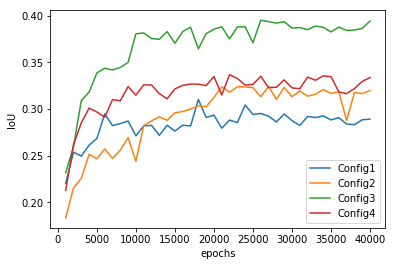

In [20]:
plt.plot(test1[:,0], test1[:,1])
plt.plot(test2[:,0], test2[:,1])
plt.plot(test3[:,0], test3[:,1])
plt.plot(test4[:,0], test4[:,1])
plt.xlabel("epochs")
plt.ylabel("IoU")
plt.legend(("Config1", "Config2", "Config3", "Config4"))

plt.show()

As can be seen from the shape of the curves IoU gradually increased with the number of training steps. After a total of about 25000 steps improvement stops at different levels. *Config1* saturates very fast with the lowest IoU. *Config2* shows slower improvement and reaches a slightly better result. The best values are achieved with *Config3* before *Config4*. The following table summarizes the overall best results from the calculated IoUs.

| Config1 | Config2 | Config3 | Config4 |
|---------|---------|---------|---------|
|   0.310 |   0.324 |   0.395 |   0.337 |

## 3. Discussion on the differences

With additional refinement modules better results can be achieved from *Config1* to *Config3*. This seems obvious, as more detailed informations from the input image are included from the skip connections thereby leading to a better distinction between different classes. Why the results of *Config4* are lower than the IoU from *Config3* is unclear. Due to the large computation time only very few tests were with a larger filter size and a different number of output features from the intermediate upsampling module were computed. However no distinct increase of the IoU could be found. 
Further tests and evaluations would be necessary in order to detect if any other of the hyper-parameters could explain the bad results or if the lower IoU on the test set is due to overfitting.